# Part 1(a)

Submitted by: Niv S 0895 

Email: niv.saban@gmail.com

Dataset: Titanic

Objective: To classify Titanic passengers as survived or not survived based on their personal attributes.

# Part 1(b)
AI agent that used - Chat-GPT & Gemini

"Create a bar chart for survival rates by gender, a histogram for the age distribution of survivors, and a scatter plot showing the relationship between SibSp and Parch for survivors."

"Normalize the Age and Fare columns in the dataset."

"Write the code for KNN and Decision Tree algorithms, including a GridSearchCV to tune at least two relevant hyperparameters for each algorithm."

"Compare the performance of the algorithms with and without data normalization."

"Create a visualization of the models' performance as a function of the feature selection results."

"Display the results in a table showing the individual scores for each of the 5 cross-validation folds, along with the mean score for each permutation."

"Generate a classification report for the final model on the test set, displaying precision, recall, and F1 scores for each class in a clear tabular format."

"Predict on the independent test set, display the first 5 predictions vs. true labels, plot the confusion matrix, and evaluate model stability with 5-fold F1-macro cross-validation."

# בעיית הלמידה והdataSet

בעיית הלמידה היא משימת סיווג בינארי שמטרתה לחזות האם נוסע על ספינת הטיטאניק שרד את האסון (ערך 1) או לא (ערך 0). סט הנתונים (dataset) מספק מידע דמוגרפי ופרטי נסיעה על הנוסעים, הכולל מאפיינים מרכזיים כמו מין, גיל, מחלקת הנסיעה (Pclass), מספר בני המשפחה על הסיפון (SibSp, Parch), והמחיר ששולם עבור הכרטיס (Fare). באמצעות מאפיינים אלו, המטרה היא לאמן מודל חיזוי שיוכל להכליל ולסווג באופן מדויק את תוצאת ההישרדות עבור נוסעים שטרם נראו.

# חלק 2 - הכנה, טעינה, EDA:

טעינת ספריות וקריאת מערכי הנתונים של ה־train וה־test:


In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, f1_score

In [120]:
train_df = pd.read_csv("titanic_train.csv")
test_df =  pd.read_csv("titanic_test.csv")

print("Head of - titanic_train.csv")
display(train_df.head())
print("Head of - titanic_test.csv")
display(test_df.head())

Head of - titanic_train.csv


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


Head of - titanic_test.csv


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


**ויזואליזציה 1: סטטיסטיקה תיאורית עבור השורדים**

**תועלת:** מספקת תובנות סטטיסטיות (ממוצע, סטיית תקן, רבעונים) על השורדים בלבד. זה עוזר לנו להבין את גילם הטיפוסי, מחיר הכרטיס ששילמו, ותכונות הקשורות למשפחה.


In [91]:
survived_df = train_df[train_df["Survived"] == 1]
survived_df.describe(include="all")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.0
mean,1.957295,0.313167,28.344165,0.487544,0.459075,48.683468,0.451957,1.0
std,0.873187,0.464609,13.552237,0.717651,0.778688,68.767186,0.664405,0.0
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,22.000000,0.000000,0.000000,12.475000,0.000000,1.0
50%,2.000000,0.000000,29.699118,0.000000,0.000000,26.000000,0.000000,1.0
75%,3.000000,1.000000,35.000000,1.000000,1.000000,57.000000,1.000000,1.0
max,3.000000,1.000000,80.000000,4.000000,5.000000,512.329200,3.000000,1.0


**ויזואליזציה 2: תרשים עמודות של שיעורי השרידות לפי מגדר**

**תועלת:** מאפשר השוואה ויזואלית פשוטה של שיעורי השרידות בין גברים לנשים, ומדגיש דפוסים ברורים.


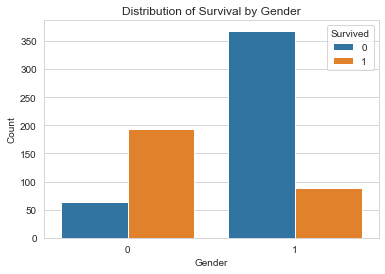

In [92]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Distribution of Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**ויזואליזציה 3: התפלגות גיל אצל השורדים**

**תועלת:** מראה האם גילאים צעירים או מבוגרים נטו לשרוד יותר, ומדגיש קבוצות סיכון מול קבוצות מוגנות



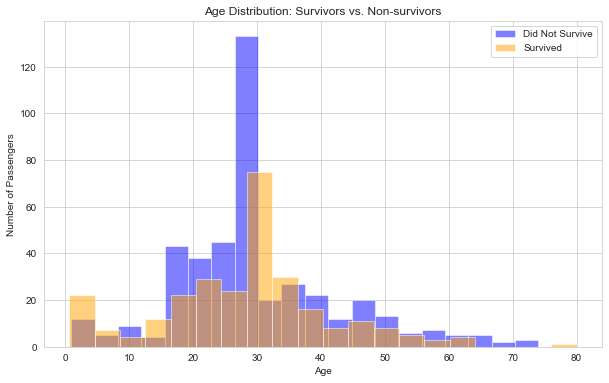

In [93]:
# יצירת גרף
plt.figure(figsize=(10, 6))

# התפלגות גילאים של מי שלא שרדו (Survived == 0)
train_df[train_df['Survived'] == 0]['Age'].dropna().plot(kind='hist', bins=20, alpha=0.5, label='Did Not Survive', color='blue')

# התפלגות גילאים של מי ששרדו (Survived == 1)
train_df[train_df['Survived'] == 1]['Age'].dropna().plot(kind='hist', bins=20, alpha=0.5, label='Survived', color='orange')

plt.title("Age Distribution: Survivors vs. Non-survivors")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

**ויזואליזציה 4: קשר בין SibSp ל־Parch אצל השורדים**

**תועלת:** מאפשר להבין את השפעת מבנה המשפחה על השרידות, ובפרט אם למשפחות מסוג מסויים היה סיכוי טוב יותר לשרוד.

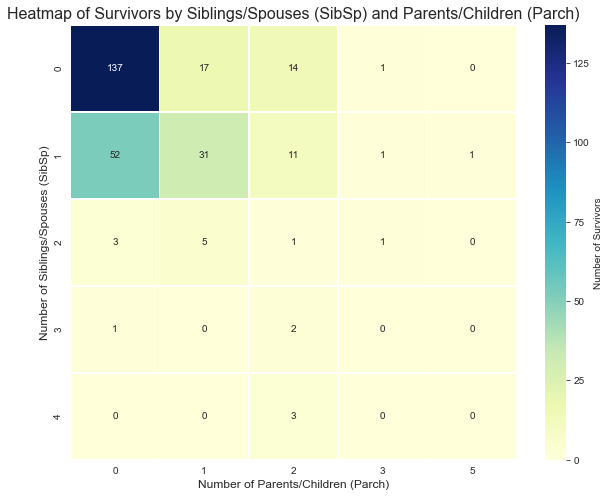

In [94]:

survivors_df = train_df[train_df['Survived'] == 1]

survivor_family_crosstab = pd.crosstab(survivors_df['SibSp'], survivors_df['Parch'])

plt.figure(figsize=(10, 8))

sns.heatmap(survivor_family_crosstab,
            annot=True,     # Show the numerical values on the map
            fmt='d',        # Format the numbers as integers
            cmap='YlGnBu',  # Choose a color palette
            linewidths=.5,  # Add lines between cells for better separation
            cbar_kws={'label': 'Number of Survivors'}) # Label the color bar

plt.title('Heatmap of Survivors by Siblings/Spouses (SibSp) and Parents/Children (Parch)', fontsize=16)
plt.xlabel('Number of Parents/Children (Parch)', fontsize=12)
plt.ylabel('Number of Siblings/Spouses (SibSp)', fontsize=12)

plt.show()

# חלק 3 הניסויים:

Feature Engineering

תהליך הנדסת המאפיינים (Feature Engineering) בפרויקט זה כלל מספר שלבים קריטיים להכנת הנתונים, אשר בוצעו באופן מאורגן באמצעות ColumnTransformer. ראשית, המאפיינים חולקו לשתי קבוצות: נומריים וקטגוריאליים. על המאפיינים הנומריים (כגון 'Age' ו-'Fare') הופעל נירמול (StandardScaler) על מנת להביאם לסולם אחיד, שלב שהינו חיוני במיוחד עבור מודלים הרגישים למרחקים כמו KNN. במקביל, המאפיינים הקטגוריאליים (כגון 'Pclass' ו-'Sex') עברו קידוד מסוג OneHotEncoder שהמיר אותם לייצוג מספרי בינארי

In [96]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- שלב 2: בניית תהליך עיבוד הנתונים המקדים (Preprocessor) ---
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

**התנסות במודלים**


--- Running SelectKBest for KNN ---


C:\Users\nivsa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNN with SelectKBest - Done.
--- Running SelectKBest for Decision Tree ---
Decision Tree with SelectKBest - Done.

     Feature Selection Results: KNN (Detailed Folds)


,Model,Num_Features,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,Mean_Score,Rank
4,KNN,5,0.833442,0.788176,0.777249,0.823429,0.726575,0.789885,1
6,KNN,7,0.791159,0.809556,0.752422,0.821802,0.737209,0.782509,2
7,KNN,8,0.796429,0.785641,0.725301,0.806483,0.764289,0.775648,3
0,KNN,1,0.806483,0.746667,0.775958,0.806483,0.739460,0.775073,4
1,KNN,2,0.806483,0.746667,0.775958,0.806483,0.739460,0.775073,4
8,KNN,9,0.806483,0.752422,0.741497,0.833442,0.729017,0.772649,6
9,KNN,10,0.804842,0.749662,0.709255,0.842015,0.742944,0.769791,7
5,KNN,6,0.799552,0.766154,0.763191,0.821802,0.696848,0.769637,8
3,KNN,4,0.833442,0.805128,0.777249,0.761353,0.649958,0.765629,9
2,KNN,3,0.806483,0.771467,0.675469,0.771396,0.649958,0.735104,10



--- Summary for KNN ---
🏆 Winning Permutation: Using 5 features.
📈 Best Mean Score: 0.7899

 Feature Selection Results: Decision Tree (Detailed Folds)


,Model,Num_Features,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,Mean_Score,Rank
4,Decision Tree,5,0.823429,0.759916,0.782135,0.847645,0.745432,0.791793,1
3,Decision Tree,4,0.823429,0.768919,0.782135,0.790511,0.739460,0.780964,2
5,Decision Tree,6,0.782788,0.759916,0.782135,0.830357,0.745432,0.780187,3
0,Decision Tree,1,0.806483,0.746667,0.775958,0.806483,0.739460,0.775073,4
1,Decision Tree,2,0.806483,0.746667,0.775958,0.806483,0.739460,0.775073,4
2,Decision Tree,3,0.806483,0.754960,0.775958,0.796429,0.739460,0.774720,6
7,Decision Tree,8,0.812544,0.711149,0.765529,0.830357,0.739460,0.771864,7
8,Decision Tree,9,0.802083,0.711149,0.765529,0.838970,0.739460,0.771494,8
6,Decision Tree,7,0.781330,0.711149,0.765529,0.830357,0.745432,0.766797,9
9,Decision Tree,10,0.820076,0.711149,0.717262,0.838970,0.739460,0.765429,10



--- Summary for Decision Tree ---
🏆 Winning Permutation: Using 5 features.
📈 Best Mean Score: 0.7918

--- Generating Combined Visualization (Based on Mean Score) ---


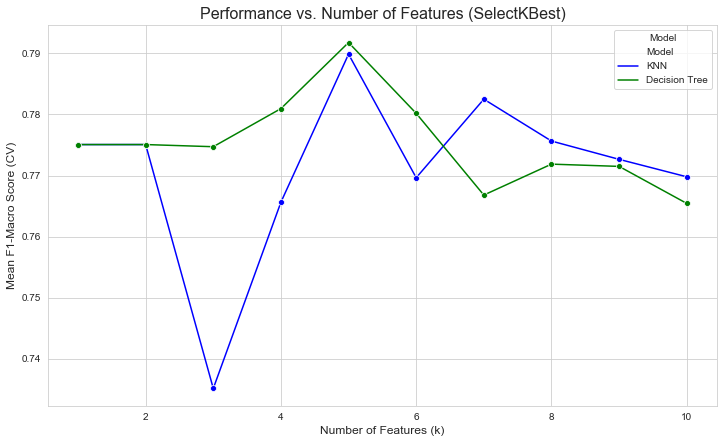

In [97]:
# --- שלב 1: טעינת הנתונים והכנתם ---
df = pd.read_csv('titanic_train.csv')
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- שלב 2: בניית תהליך עיבוד הנתונים המקדים (Preprocessor) ---
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# --- שלב 3: הרצת GridSearch עם SelectKBest עבור שני המודלים ---

# הרצה עבור KNN
print("--- Running SelectKBest for KNN ---")
kbest_pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif)),
    ('classifier', KNeighborsClassifier(n_neighbors=9, weights='uniform'))
])
param_grid_kbest_knn = {'feature_selector__k': range(1, 11)}
grid_search_kbest_knn = GridSearchCV(kbest_pipeline_knn, param_grid_kbest_knn, cv=5, scoring='f1_macro', verbose=0)
grid_search_kbest_knn.fit(X_train, y_train)
print("KNN with SelectKBest - Done.")

# הרצה עבור עץ החלטה
print("--- Running SelectKBest for Decision Tree ---")
kbest_pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif)),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42))
])
param_grid_kbest_dt = {'feature_selector__k': range(1, 11)}
grid_search_kbest_dt = GridSearchCV(kbest_pipeline_dt, param_grid_kbest_dt, cv=5, scoring='f1_macro', verbose=0)
grid_search_kbest_dt.fit(X_train, y_train)
print("Decision Tree with SelectKBest - Done.")


# --- שלב 4: הצגת התוצאות בטבלאות נפרדות ומפורטות ---
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1200)

split_cols = [f'split{i}_test_score' for i in range(5)]

# --- טבלת KNN ---
print("\n" + "="*80)
print("     Feature Selection Results: KNN (Detailed Folds)")
print("="*80)
results_knn = pd.DataFrame(grid_search_kbest_knn.cv_results_)
# *** כאן השינוי: הוספת mean_test_score לרשימת העמודות ***
columns_to_show_detailed = ['param_feature_selector__k'] + split_cols + ['mean_test_score', 'rank_test_score']
display_df_knn = results_knn[columns_to_show_detailed]
# *** כאן השינוי: הוספת Mean_Score לרשימת השמות ***
display_df_knn.columns = ['Num_Features', 'Fold_1', 'Fold_2', 'Fold_3', 'Fold_4', 'Fold_5', 'Mean_Score', 'Rank']
display_df_knn.insert(0, 'Model', 'KNN')
display(display_df_knn.sort_values(by='Rank'))

# סיכום התוצאות עבור KNN
best_k_knn = grid_search_kbest_knn.best_params_['feature_selector__k']
best_mean_score_knn = grid_search_kbest_knn.best_score_
print("\n--- Summary for KNN ---")
print(f"🏆 Winning Permutation: Using {best_k_knn} features.")
print(f"📈 Best Mean Score: {best_mean_score_knn:.4f}")

# --- טבלת עץ החלטה ---
print("\n" + "="*80)
print(" Feature Selection Results: Decision Tree (Detailed Folds)")
print("="*80)
results_dt = pd.DataFrame(grid_search_kbest_dt.cv_results_)
display_df_dt = results_dt[columns_to_show_detailed]
display_df_dt.columns = ['Num_Features', 'Fold_1', 'Fold_2', 'Fold_3', 'Fold_4', 'Fold_5', 'Mean_Score', 'Rank']
display_df_dt.insert(0, 'Model', 'Decision Tree')
display(display_df_dt.sort_values(by='Rank'))

# סיכום התוצאות עבור עץ החלטה
best_k_dt = grid_search_kbest_dt.best_params_['feature_selector__k']
best_mean_score_dt = grid_search_kbest_dt.best_score_
print("\n--- Summary for Decision Tree ---")
print(f"🏆 Winning Permutation: Using {best_k_dt} features.")
print(f"📈 Best Mean Score: {best_mean_score_dt:.4f}")


# --- שלב 5: הצגת ויזואליזציה מאוחדת (מבוססת על הציון הממוצע) ---
print("\n--- Generating Combined Visualization (Based on Mean Score) ---")
# מכיוון שעמודת הממוצע כבר קיימת, אין צורך להוסיף אותה שוב
combined_display_df = pd.concat([display_df_knn, display_df_dt])
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.lineplot(
    data=combined_display_df,
    x='Num_Features',
    y='Mean_Score',
    hue='Model',
    marker='o',
    palette={'KNN': 'blue', 'Decision Tree': 'green'}
)
ax.set_title('Performance vs. Number of Features (SelectKBest)', fontsize=16)
ax.set_xlabel('Number of Features (k)', fontsize=12)
ax.set_ylabel('Mean F1-Macro Score (CV)', fontsize=12)
ax.legend(title='Model')
plt.grid(True)
plt.show()

הצגה ויזואלית של היחס בין האלוגריתמים לפני נירמול הנתונים ולאחר מכן

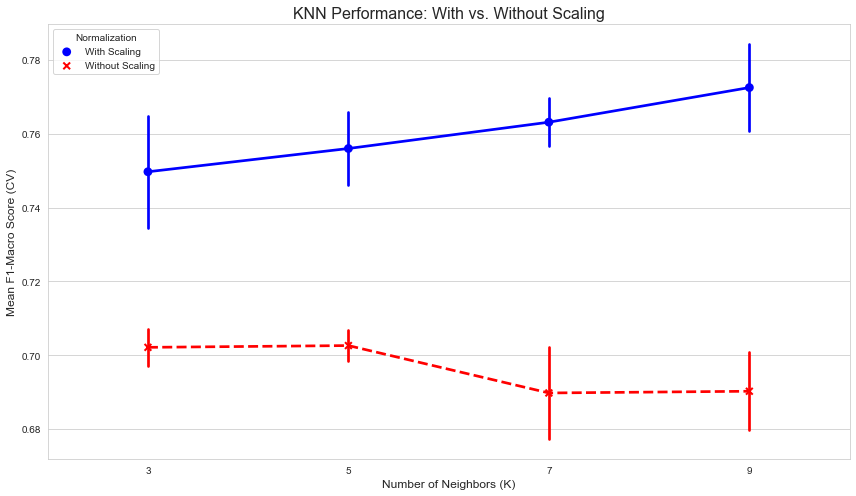

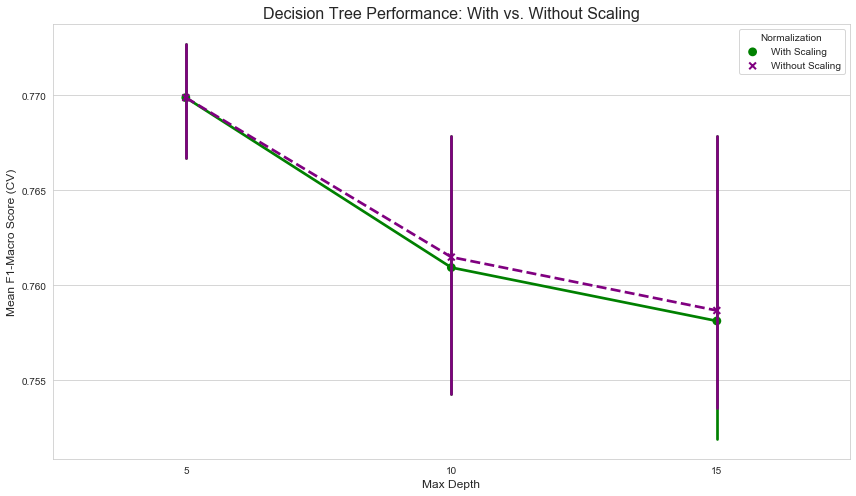

In [98]:
# --- ויזואליזציה 2: ניתוח השפעת הנירמול על KNN ---
knn_results_df = pd.DataFrame(grid_search_knn.cv_results_)

def clean_scaler_name(scaler):
    if isinstance(scaler, StandardScaler):
        return 'With Scaling'
    return 'Without Scaling'
knn_results_df['Scaler Type'] = knn_results_df['param_preprocessor__numeric__scaler'].apply(clean_scaler_name)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax2 = sns.pointplot(data=knn_results_df, x='param_classifier__n_neighbors', y='mean_test_score', hue='Scaler Type', palette={'With Scaling': 'blue', 'Without Scaling': 'red'}, markers=['o', 'x'], linestyles=['-', '--'])
ax2.set_title('KNN Performance: With vs. Without Scaling', fontsize=16)
ax2.set_xlabel('Number of Neighbors (K)', fontsize=12)
ax2.set_ylabel('Mean F1-Macro Score (CV)', fontsize=12)
ax2.legend(title='Normalization')
plt.tight_layout()
plt.show()

# --- ויזואליזציה 3: ניתוח השפעת הנירמול על עץ החלטה ---
dt_results_df = pd.DataFrame(grid_search_dt.cv_results_)
dt_results_df['Scaler Type'] = dt_results_df['param_preprocessor__numeric__scaler'].apply(clean_scaler_name)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax3 = sns.pointplot(data=dt_results_df, x='param_classifier__max_depth', y='mean_test_score', hue='Scaler Type', palette={'With Scaling': 'green', 'Without Scaling': 'purple'}, markers=['o', 'x'], linestyles=['-', '--'])
ax3.set_title('Decision Tree Performance: With vs. Without Scaling', fontsize=16)
ax3.set_xlabel('Max Depth', fontsize=12)
ax3.set_ylabel('Mean F1-Macro Score (CV)', fontsize=12)
ax3.legend(title='Normalization')
plt.tight_layout()
plt.show()

בחירת האלגוריתם המנצח עם הפרומטציות המוצלחות ביותר

In [99]:
# --- Step 6: Automatic Comparison and Selection of the Winning Model ---

# Get the best mean score from each run
best_score_knn = grid_search_kbest_knn.best_score_
best_score_dt = grid_search_kbest_dt.best_score_

# Get the optimal number of features from each run
best_k_knn = grid_search_kbest_knn.best_params_['feature_selector__k']
best_k_dt = grid_search_kbest_dt.best_params_['feature_selector__k']

print("="*50)
print("     Final Conclusion & Winning Model")
print("="*50)

# Compare the two models and print the winner
if best_score_knn > best_score_dt:
    print("🏆 The winning model is: KNN with SelectKBest")
    print(f"   - Best Mean Score: {best_score_knn:.4f}")
    print(f"   - Optimal Number of Features: {best_k_knn}")
elif best_score_dt > best_score_knn:
    print("🏆 The winning model is: Decision Tree with SelectKBest")
    print(f"   - Best Mean Score: {best_score_dt:.4f}")
    print(f"   - Optimal Number of Features: {best_k_dt}")
else:
    print("🏆 It's a tie! Both models achieved the same mean score.")
    print(f"   - KNN: Score {best_score_knn:.4f} with {best_k_knn} features.")
    print(f"   - Decision Tree: Score {best_score_dt:.4f} with {best_k_dt} features.")

     Final Conclusion & Winning Model
🏆 The winning model is: Decision Tree with SelectKBest
   - Best Mean Score: 0.7918
   - Optimal Number of Features: 5


# חלק 4 אימון

לאחר שגילינו שהאלגוריתם המוצלח הוא עץ ההחלטה ללא יצירת התכונה החדשה,
כעת נאמן את המודל מחדש לפי הקומיבנציה הזו

In [85]:
# --- הגדרת ה-Pipeline הסופי עם הפרמטרים המנצחים ---
# הפרמטרים הם אלו שהתקבלו מההרצה הקודמת: עץ החלטה עם 5 מאפיינים
final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif, k=5)),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42))
])

# --- אימון המודל הסופי על כל סט האימון (X_train, y_train) ---
print("--- Training the final winning model on the entire training set... ---")
final_model_pipeline.fit(X_train, y_train)

print("\n✅ Done!")
print("The final model is now trained and ready for evaluation on the test set in the next step.")

--- Training the final winning model on the entire training set... ---

✅ Done!
The final model is now trained and ready for evaluation on the test set in the next step.


# חלק 5 - חיזוי ובדיקת איכות

,Actual Value,Model Prediction
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0



--- Confusion Matrix ---


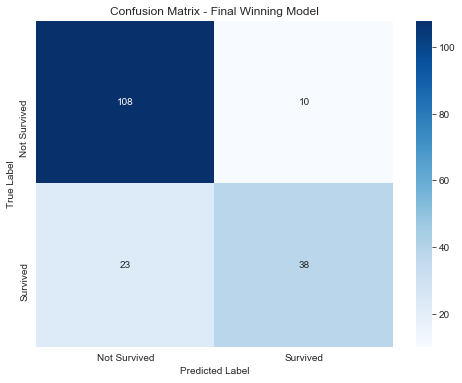


Cross-validation on test_df (5 folds, independent evaluation):
Fold 1: 0.7533
Fold 2: 0.7305
Fold 3: 0.7243
Fold 4: 0.6759
Fold 5: 0.8600

Mean F1 Score across 5 folds (test_df): 0.7488


In [118]:
X_test_final = test_df.drop('Survived', axis=1)
y_test_final = test_df['Survived']

# חיזוי על סט המבחן
y_pred_final = final_model_pipeline.predict(X_test_final)

comparison_df_head = pd.DataFrame({
    'Actual Value': y_test_final.head(5).values,
    'Model Prediction': y_pred_final[:5]
})
display(comparison_df_head)

# --- שלב 2: מטריצת בלבול ---
cm = confusion_matrix(y_test_final, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix - Final Winning Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# --- שלב 5: Cross-validation עצמאי על test_df ---
cv_scores_eval = cross_val_score(final_model_pipeline, X_test_final, y_test_final, cv=5, scoring="f1_macro")

print("\nCross-validation on test_df (5 folds, independent evaluation):")
for i, score in enumerate(cv_scores_eval, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nMean F1 Score across 5 folds (test_df): {np.mean(cv_scores_eval):.4f}")